<a href="https://colab.research.google.com/github/duhajarrar/TelecomMIT/blob/main/Draft2GOOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#duha
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
import plotly.express as px
import tensorflow as tf
from imblearn.over_sampling import SMOTE
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



# Read Data

In [ ]:
trainingData = pd.read_csv("drive/MyDrive/telecom.csv")
trainingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [ ]:
trainingData.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Label Encoding

In [ ]:

label_encoder = preprocessing.LabelEncoder()
trainingData['state'] = label_encoder.fit_transform(trainingData['state'])
trainingData['international plan'] = label_encoder.fit_transform(trainingData['international plan'])
trainingData['voice mail plan'] = label_encoder.fit_transform(trainingData['voice mail plan'])
trainingData['churn'] = label_encoder.fit_transform(trainingData['churn'])
trainingData['phone number'] = label_encoder.fit_transform(trainingData['phone number'])


# Rename Columns

In [ ]:
for i in range(len(trainingData.columns)):
  trainingData.rename(columns={trainingData.columns[i]: trainingData.columns[i].replace(r' ','_')}, inplace=True)


# Find the percent of churn customer to non-churn customer

483
Churn Percentage = 14.491449144914492


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



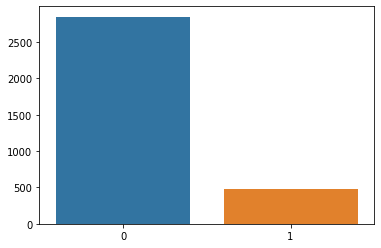

In [ ]:
y = trainingData['churn'].value_counts()
sns.barplot(y.index, y.values)
y_True = trainingData["churn"][trainingData["churn"] == True]
print(y_True.shape[0])
print ("Churn Percentage = "+str( (y_True.shape[0] / trainingData["churn"].shape[0]) * 100 ))

In [ ]:
trainingData.describe()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
count,3333.000000,3333.000000,3333.000000,3333.00000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,26.059406,101.064806,437.182418,1666.00000,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,14.824911,39.822106,42.371290,962.29855,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,0.000000,1.000000,408.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,74.000000,408.000000,833.00000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.000000,101.000000,415.000000,1666.00000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.000000,127.000000,510.000000,2499.00000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,50.000000,243.000000,510.000000,3332.00000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [ ]:
col=trainingData.columns
print(col)

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')


In [ ]:
churn=trainingData[trainingData['churn']==True]
non_churn=trainingData[trainingData['churn']==False]

international_plan
0.2836438923395445
0.06526315789473684


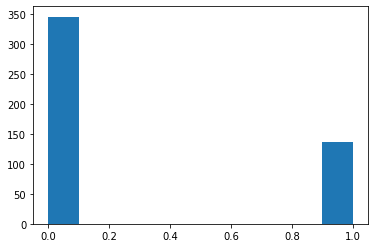

In [ ]:

print(col[4])
hist(trainingData[col[4]],weights=trainingData['churn'])
international_plan_Ch=(churn['international_plan']).sum()/churn.shape[0]
international_plan_NonCh=(non_churn['international_plan']).sum()/non_churn.shape[0]
print(international_plan_Ch)
print(international_plan_NonCh)

area_code
437.8178053830228
437.07473684210527


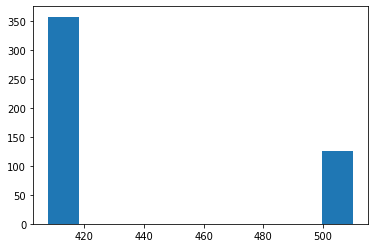

In [ ]:

print(col[2])
hist(trainingData[col[2]],weights=trainingData['churn'])
international_plan_Ch=(churn['area_code']).sum()/churn.shape[0]
international_plan_NonCh=(non_churn['area_code']).sum()/non_churn.shape[0]
print(international_plan_Ch)
print(international_plan_NonCh)

**NOTE:** here from above avg for churn and non-churn data we can say "area_code" not important

total_day_minutes
206.91407867494823
175.1757543859649


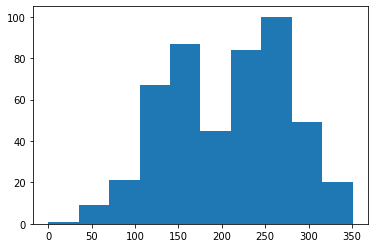

In [ ]:

print(col[7])
hist(trainingData[col[7]],weights=trainingData['churn'])
international_plan_Ch=(churn['total_day_minutes']).sum()/churn.shape[0]
international_plan_NonCh=(non_churn['total_day_minutes']).sum()/non_churn.shape[0]
print(international_plan_Ch)
print(international_plan_NonCh)

total_day_charge
35.17592132505176
29.780421052631578


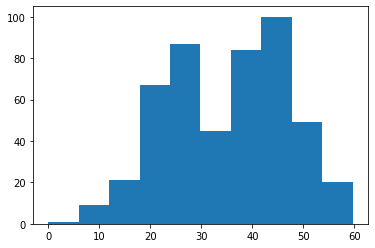

In [ ]:

print(col[9])
hist(trainingData[col[9]],weights=trainingData['churn'])
international_plan_Ch=(churn['total_day_charge']).sum()/churn.shape[0]
international_plan_NonCh=(non_churn['total_day_charge']).sum()/non_churn.shape[0]
print(international_plan_Ch)
print(international_plan_NonCh)

customer_service_calls
2.229813664596273
1.4498245614035088


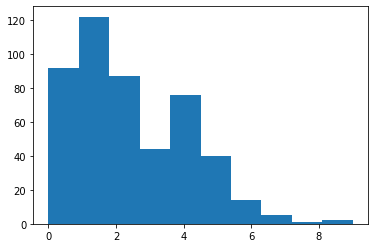

In [ ]:

print(col[19])
hist(trainingData[col[19]],weights=trainingData['churn'])
international_plan_Ch=(churn['customer_service_calls']).sum()/churn.shape[0]
international_plan_NonCh=(non_churn['customer_service_calls']).sum()/non_churn.shape[0]
print(international_plan_Ch)
print(international_plan_NonCh)

#Churn percentage


In [ ]:

fig = px.pie(trainingData, names='churn', title='churn',width=400, height=400)
fig.show()

**IMPORTANT NOTE :So we need to resample the data**

# Find Correlation 

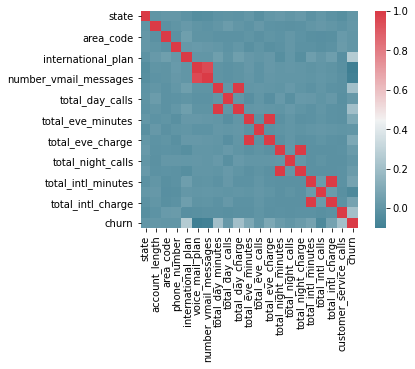

In [ ]:

corr = trainingData.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)

In [ ]:
corr['churn']

state                     0.007780
account_length            0.016541
area_code                 0.006174
phone_number              0.005626
international_plan        0.259852
voice_mail_plan          -0.102148
number_vmail_messages    -0.089728
total_day_minutes         0.205151
total_day_calls           0.018459
total_day_charge          0.205151
total_eve_minutes         0.092796
total_eve_calls           0.009233
total_eve_charge          0.092786
total_night_minutes       0.035493
total_night_calls         0.006141
total_night_charge        0.035496
total_intl_minutes        0.068239
total_intl_calls         -0.052844
total_intl_charge         0.068259
customer_service_calls    0.208750
churn                     1.000000
Name: churn, dtype: float64

# Resample Data using SMOTE

In [ ]:

y = trainingData['churn']
x = trainingData.drop({'churn'}, axis=1)
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=27)
sm = SMOTE(random_state=27, ratio=1.0)
print(x_train.shape[0], y_train.shape[0])
x_train, y_train = sm.fit_sample(x_train, y_train)
print(x_train.shape[0], y_train.shape[0])
z=0
for i in y_train:
  if i ==1:
    z+=1
print(z)


2499 2499
4242 4242
2121


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



# Gradient Boosting Classifier

accuracy_score=  94.96402877697841
pr_score=  94.96402877697841
recall_score=  83.80952380952381
f1_score=  80.73394495412845


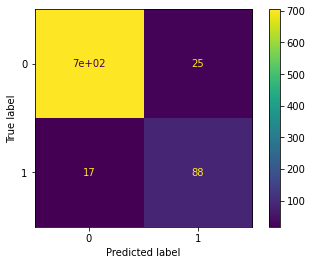

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       729
           1       0.78      0.84      0.81       105

    accuracy                           0.95       834
   macro avg       0.88      0.90      0.89       834
weighted avg       0.95      0.95      0.95       834



In [ ]:
from sklearn.model_selection import GridSearchCV

estimator= GradientBoostingClassifier(random_state=0, warm_start = True)
#estimator=GridSearchCV(rf1, cv = 3, n_jobs = -1, verbose = 2)
estimator.fit(x_train,y_train)
smote_pred=estimator.predict(x_test)
acc_test_smote= accuracy_score(y_test, smote_pred)*100
acc_pr_smote = precision_score(y_test, smote_pred, average='micro')*100
acc_recall_smote= recall_score(y_test, smote_pred)*100
acc_f1_smote= f1_score(y_test, smote_pred)*100
print('accuracy_score= ', acc_test_smote)
print('pr_score= ', acc_pr_smote)
print('recall_score= ', acc_recall_smote)
print('f1_score= ', acc_f1_smote)
plot_confusion_matrix(estimator, x_test, y_test)
plt.show()
from sklearn.metrics import classification_report, recall_score, precision_score, accuracy_score 
classification_report_actual = classification_report(y_test,smote_pred ) 
print(classification_report_actual )

# Random Forest Classifier

accuracy_score=  95.56354916067147
pr_score=  95.56354916067147
recall_score=  80.95238095238095
f1_score=  82.1256038647343


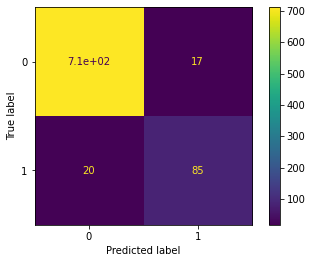

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       729
           1       0.83      0.81      0.82       105

    accuracy                           0.96       834
   macro avg       0.90      0.89      0.90       834
weighted avg       0.96      0.96      0.96       834



In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedShuffleSplit, GridSearchCV
positive_weight = sum(y_train == 0) / sum(y_train == 1) 
estimator = RandomForestClassifier(random_state=0, class_weight = {0 : 1, 1 : positive_weight}, warm_start = True, n_jobs = 10, oob_score = True)
estimator.fit(x_train,y_train)
smote_pred=estimator.predict(x_test)
acc_test_smote= accuracy_score(y_test, smote_pred)*100
acc_pr_smote = precision_score(y_test, smote_pred, average='micro')*100
acc_recall_smote= recall_score(y_test, smote_pred)*100
acc_f1_smote= f1_score(y_test, smote_pred)*100
print('accuracy_score= ', acc_test_smote)
print('pr_score= ', acc_pr_smote)
print('recall_score= ', acc_recall_smote)
print('f1_score= ', acc_f1_smote)
plot_confusion_matrix(estimator, x_test, y_test)
plt.show()
from sklearn.metrics import classification_report, recall_score, precision_score, accuracy_score 
classification_report_actual = classification_report(y_test,smote_pred ) 
print(classification_report_actual )

# K-Fold Cross Validation 

In [ ]:

y = trainingData['churn']
x = trainingData.drop({'churn'}, axis=1)
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)
sm = SMOTE(random_state=27, ratio=1.0)
x,y= sm.fit_sample(x,y)
print(x.shape[0], y.shape[0])
z=0
zz=0
for i in y:
  if i ==1:
    z+=1
  else:
    zz+=1
print(z)
print(zz)
print(z+zz)


5700 5700
2850
2850
5700


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [ ]:
from sklearn.model_selection import KFold
kf = KFold( n_splits = 4 )

##LR
from sklearn.linear_model import LogisticRegression
ACC_test_lr = []; Per_test_lr = []; Recall_test_lr = [];f_test_lr = [];

##DT
from sklearn.tree import DecisionTreeClassifier
ACC_test_dt = []; Per_test_dt = [];Recall_test_dt = [];f_test_dt = [];


##SVM
from sklearn.svm import SVC
ACC_test_svm = []; Per_test_svm = [];Recall_test_svm = [];f_test_svm = [];


##RF
from sklearn.ensemble import RandomForestClassifier
ACC_test_rf = []; Per_test_rf = [];Recall_test_rf = [];f_test_rf = [];


##NB
from sklearn.naive_bayes import GaussianNB
ACC_test_nb = []; Per_test_nb = [];Recall_test_nb = [];f_test_nb = [];


ACC_test_gb = []; Per_test_gb = [];Recall_test_gb = [];f_test_gb = [];

import numpy as np
for train_index,test_index in kf.split(range(x.shape[0])):
  y_train = [y[i] for i in train_index]
  y_test = [y[i] for i in test_index]
  x_train = [np.array(x)[i,:] for i in train_index]
  x_test = [np.array(x)[i,:] for i in test_index]
   
  estimator = GradientBoostingClassifier(n_estimators= 1800,max_features= 'sqrt',max_depth= None)
  estimator.fit(x_train,y_train)
  smote_pred=estimator.predict(x_test)
  ACC_test_gb.append(accuracy_score(y_test, smote_pred))
  Per_test_gb.append(precision_score(y_test, smote_pred, average='micro'))
  Recall_test_gb.append(recall_score(y_test, smote_pred))
  f_test_gb.append(f1_score(y_test, smote_pred))

  estimator = LogisticRegression(random_state=27, warm_start = True)
  estimator.fit(x_train,y_train)
  smote_pred=estimator.predict(x_test)
  ACC_test_lr.append(accuracy_score(y_test, smote_pred))
  Per_test_lr.append(precision_score(y_test, smote_pred, average='micro'))
  Recall_test_lr.append(recall_score(y_test, smote_pred))
  f_test_lr.append(f1_score(y_test, smote_pred))

  estimator = DecisionTreeClassifier(random_state=0)
  estimator.fit(x_train,y_train)
  smote_pred=estimator.predict(x_test)
  ACC_test_dt.append(accuracy_score(y_test, smote_pred))
  Per_test_dt.append(precision_score(y_test, smote_pred, average='micro'))
  Recall_test_dt.append(recall_score(y_test, smote_pred))
  f_test_dt.append(f1_score(y_test, smote_pred))

  estimator = SVC(random_state=0)
  estimator.fit(x_train,y_train)
  smote_pred=estimator.predict(x_test)
  ACC_test_svm.append(accuracy_score(y_test, smote_pred))
  Per_test_svm.append(precision_score(y_test, smote_pred, average='micro'))
  Recall_test_svm.append(recall_score(y_test, smote_pred))
  f_test_svm.append(f1_score(y_test, smote_pred))


  estimator = RandomForestClassifier(n_estimators= 1800,max_features= 'sqrt',max_depth= None)
  estimator.fit(x_train,y_train)
  smote_pred=estimator.predict(x_test)
  ACC_test_rf.append(accuracy_score(y_test, smote_pred))
  Per_test_rf.append(precision_score(y_test, smote_pred, average='micro'))
  Recall_test_rf.append(recall_score(y_test, smote_pred))
  f_test_rf.append(f1_score(y_test, smote_pred))


  estimator = GaussianNB()
  estimator.fit(x_train,y_train)
  smote_pred=estimator.predict(x_test)
  ACC_test_nb.append(accuracy_score(y_test, smote_pred))
  Per_test_nb.append(precision_score(y_test, smote_pred, average='micro'))
  Recall_test_nb.append(recall_score(y_test, smote_pred))
  f_test_nb.append(f1_score(y_test, smote_pred))

## compute the mean of accuracy of the K-Fold datasets
ACC_test_lr_mean = np.mean(ACC_test_lr); Per_test_lr_mean = np.mean(Per_test_lr);
Recall_test_lr_mean = np.mean(Recall_test_lr);f_test_lr_mean = np.mean(f_test_lr);

 
ACC_test_dt_mean = np.mean(ACC_test_dt);Per_test_dt_mean = np.mean(Per_test_dt);
Recall_test_dt_mean = np.mean(Recall_test_dt);f_test_dt_mean = np.mean(f_test_dt);

ACC_test_svm_mean = np.mean(ACC_test_svm); Per_test_svm_mean = np.mean(Per_test_svm);
Recall_test_svm_mean = np.mean(Recall_test_svm);f_test_svm_mean = np.mean(f_test_svm);


ACC_test_rf_mean = np.mean(ACC_test_rf);Per_test_rf_mean = np.mean(Per_test_rf);
Recall_test_rf_mean = np.mean(Recall_test_rf);f_test_rf_mean = np.mean(f_test_rf);


ACC_test_nb_mean = np.mean(ACC_test_nb); Per_test_nb_mean = np.mean(Per_test_nb);
Recall_test_nb_mean = np.mean(Recall_test_nb);f_test_nb_mean = np.mean(f_test_nb);


ACC_test_gb_mean = np.mean(ACC_test_gb); Per_test_gb_mean = np.mean(Per_test_gb);
Recall_test_gb_mean = np.mean(Recall_test_gb);f_test_gb_mean = np.mean(f_test_gb);

from prettytable import PrettyTable
t = PrettyTable(['', 'Logistic (%)' , 'DT (%)' , 'SVM (%)' , 'RF (%)','GB (%)', 'NB (%)'])
t.add_row(['Accuracy', ACC_test_lr_mean*100, ACC_test_dt_mean*100, ACC_test_svm_mean*100, ACC_test_rf_mean*100,ACC_test_gb_mean*100, ACC_test_nb_mean*100])
t.add_row(['Precision', Per_test_lr_mean*100, Per_test_dt_mean*100, Per_test_svm_mean*100, Per_test_rf_mean*100, Per_test_gb_mean*100, Per_test_nb_mean*100])
t.add_row(['Recall', Recall_test_lr_mean*100, Recall_test_dt_mean*100, Recall_test_svm_mean*100, Recall_test_rf_mean*100, Recall_test_gb_mean*100, Recall_test_nb_mean*100])
t.add_row(['f1_Score', f_test_lr_mean*100,f_test_dt_mean*100, f_test_svm_mean*100, f_test_rf_mean*100, f_test_gb_mean*100, f_test_nb_mean*100])
print(t)

+-----------+--------------------+-------------------+-------------------+-------------------+-------------------+-------------------+
|           |    Logistic (%)    |       DT (%)      |      SVM (%)      |       RF (%)      |       GB (%)      |       NB (%)      |
+-----------+--------------------+-------------------+-------------------+-------------------+-------------------+-------------------+
|  Accuracy | 68.08771929824562  | 90.57894736842104 | 89.89473684210526 | 94.54385964912281 | 95.05263157894737 | 75.01754385964912 |
| Precision | 68.08771929824562  | 90.57894736842104 | 89.89473684210526 | 94.54385964912281 | 95.05263157894737 | 75.01754385964912 |
|   Recall  | 74.33788090849399  | 90.15221266662901 | 89.81421267746558 |  92.7522894535748 |  93.0818917292901 | 80.03868593854774 |
|  f1_Score | 60.299091858977015 | 82.15019597020616 | 82.43029196010228 | 89.54567324609845 | 90.43751089979764 | 65.21746330611725 |
+-----------+--------------------+-------------------+-

# Hyper

In [ ]:
####trying to improve RandomForest by tuning hyperparameters

from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {
'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=27, n_jobs = 50)
# Fit the model
rfc_random.fit(x_train, y_train)
# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done  11 out of  30 | elapsed:  2.4min remaining:  4.1min
[Parallel(n_jobs=50)]: Done  27 out of  30 | elapsed:  3.8min remaining:   25.3s
[Parallel(n_jobs=50)]: Done  30 out of  30 | elapsed:  4.0min finished


{'n_estimators': 1800, 'max_features': 'sqrt', 'max_depth': None}
